In [1]:
import os
import numpy as np
import qiskit as qiskit
import qiskit_superstaq as qss
from qiskit import *

provider = qss.SuperstaQProvider(api_key="api key here")

In [2]:
# getting QMARINA circuit list

# Number of emitters
N = 3

# Cavity linewidth and time
kappa = 5      # cavity linewidth
g = 2         # in 2pi*GHz
tlist = np.linspace(0,3,51)  #in ns

# Initial emitter excitation
c0 = [1]
for i in range(N-1):
    c0.append(0)

shots = 10000
population1 = []
population2 = []
all_qc = []

for t in tlist:

    # Quantum register
    qr = QuantumRegister(N+1, name='q')
    cr = ClassicalRegister(N+1, name='c')

    # Quantum circuit
    qc = QuantumCircuit(qr,cr)

    environment = N # index of the last qubit
    
    # Laplace transform terms
    c = []
    P = kappa*kappa-16*g*g*N
    if P>0:
        D = np.sqrt(P)
        
    else:
        D = np.sqrt(-P)
        
    sum_c = 0
    for i in range(N):
        sum_c = sum_c + c0[i]
        
    c = []
    for i in range(N):
        c.append((N*c0[i] - sum_c)/N + sum_c*np.exp(-kappa*t/4)*(kappa/D *np.sin(D*t/4)+ np.cos(D*t/4))/N)
            
    # Quantum circuit coefficients
    theta = []
    coef = 1
    for i in range(N):
        if i == 0:
            theta.append(np.arccos(c[0]))
            coef = np.sin(theta[0])
        else:
            if c[i] == 0:
                theta.append(0)
            else:
                theta.append(np.arcsin(c[i]/coef))
            coef = coef * np.cos(theta[i])
    
    # Construct quantum circuit
    qc.x(0)
    qc.cu(2 * theta[0], 0, 0, 0, 0, environment)
    qc.cx(environment, 0)
    
    for i in range(N-1):
        qc.cu(2 * theta[i+1], 0, 0, 0, environment, i+1)
        qc.cx(i+1, environment)
    
    #qc.barrier()
  
    for i in range(N+1):
        qc.measure(i,i)

    all_qc.append(qc)

In [3]:
compiler_output = provider.qscout_compile(qc)

# compiled_circuits_zz = provider.qscout_compile(all_qc, base_entangling_gate='zz', mirror_swaps=False)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfb in position 170: invalid start byte

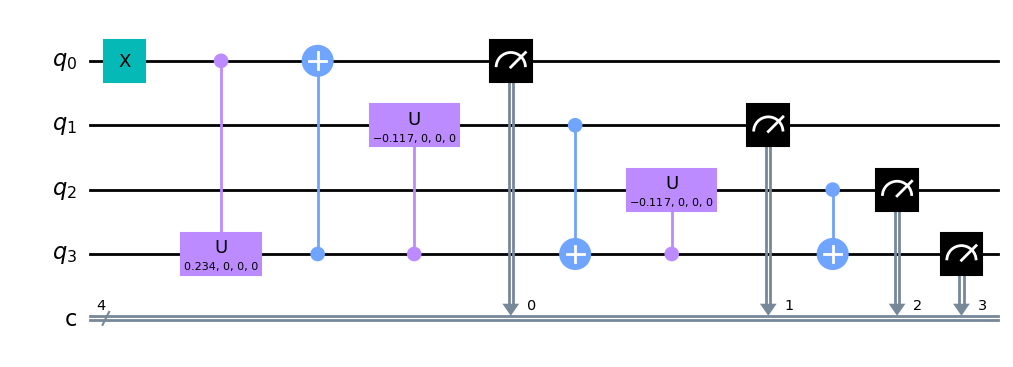

In [38]:
all_qc[1].draw('mpl')